In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import resample
from sklearn.metrics import *
from sklearn import model_selection
import matplotlib.pyplot as plt
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importdata
data=pd.read_excel('data6000.xlsx',sep=';', error_bad_lines = False)
data = data.dropna()
data['kelas'] = pd.to_numeric(data['kelas'], downcast='integer')
data.head()

,ulasan,kelas
0,"Parah si ini ceker terparah yg pernah d makan,...",0
1,Isi cekernya banyak. Pedasnya juara. Cekernya ...,1
2,Pas buat tempat meetup sama temen-temen becaus...,0
3,1. Lokasinya mudah ditemukan krn strategis pas...,1
4,Food: Tidak seperti yang digembar-gemborkan da...,0


In [3]:
#infodata
new_data = pd.DataFrame()
new_data['ulasan']=data['ulasan']
new_data['kelas']=data['kelas']

In [4]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6004 entries, 0 to 6003
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ulasan  6004 non-null   object
 1   kelas   6004 non-null   int8  
dtypes: int8(1), object(1)
memory usage: 99.7+ KB


In [5]:
#lowercase
new_data['ulasan'] = new_data['ulasan'].str.lower()
new_data['ulasan'].head()

0    parah si ini ceker terparah yg pernah d makan,...
1    isi cekernya banyak. pedasnya juara. cekernya ...
2    pas buat tempat meetup sama temen-temen becaus...
3    1. lokasinya mudah ditemukan krn strategis pas...
4    food: tidak seperti yang digembar-gemborkan da...
Name: ulasan, dtype: object

In [6]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [7]:
#Stemmer
words = []
for i, kalimat in enumerate (new_data['ulasan']):
    stop = stemmer.stem(kalimat)
    words.append(stop)

In [8]:
new = pd.DataFrame()
new['ulasan']=pd.Series(words)

In [9]:
new['ulasan'].head()

0    parah si ini ceker parah yg pernah d makan ga ...
1    isi ceker banyak pedas juara ceker lembut buat...
2    pas buat tempat meetup sama temen-temen becaus...
3    1 lokasi mudah temu krn strategis pas pengkol ...
4    food tidak seperti yang digembar-gemborkan dan...
Name: ulasan, dtype: object

In [10]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

In [11]:
#stopword
wordss = []
for i, kalimat in enumerate (new['ulasan']):
    stops = stopword.remove(kalimat)
    wordss.append(stops)

In [12]:
news = pd.DataFrame()
news['ulasan']=pd.Series(wordss)

In [13]:
news['ulasan'].head()

0    parah si ceker parah yg pernah d makan ga sesu...
1    isi ceker banyak pedas juara ceker lembut buat...
2    pas buat tempat meetup sama temen-temen becaus...
3    1 lokasi mudah temu krn strategis pas pengkol ...
4    food digembar-gemborkan sesuai ekspektasi turu...
Name: ulasan, dtype: object

In [14]:
#TOKENIZING
tokenized=[]
for x in news['ulasan']:
    temporary=word_tokenize(x)
    #print(temporary)
    temporary=[word for word in temporary if word.isalpha()]
    tokenized.append(temporary)

In [15]:
tokenized

[['parah',
  'si',
  'ceker',
  'parah',
  'yg',
  'pernah',
  'd',
  'makan',
  'ga',
  'sesuai',
  'advertising',
  'banget',
  'laper',
  'uda',
  'nunggu',
  'g',
  'k',
  'pas',
  'buka',
  'ceker',
  'begini',
  'yg',
  'dateng',
  'sedih',
  'banget',
  'yaa',
  'hitam',
  'selera',
  'makan',
  'hilang',
  'trs',
  'yg',
  'lebih',
  'parah',
  'kuah',
  'loh',
  'rasa',
  'persis',
  'sambel',
  'bangkok',
  'tp',
  'versi',
  'kuah',
  'and',
  'asin',
  'banget',
  'bener',
  'kecewa',
  'sih',
  'n',
  'ga',
  'makan',
  'bener',
  'ilfeel',
  'ga',
  'beli',
  'sihhhh',
  'cukup',
  'tau',
  'aja',
  'yaa'],
 ['isi',
  'ceker',
  'banyak',
  'pedas',
  'juara',
  'ceker',
  'lembut',
  'buat',
  'gue',
  'bingung',
  'gimana',
  'makan',
  'ceker',
  'alas',
  'gue',
  'mau',
  'makan',
  'ceker',
  'samping',
  'diajarin',
  'sih',
  'sama',
  'cowo',
  'gue',
  'gimana',
  'cara',
  'makan',
  'ceker',
  'nya',
  'buat',
  'minum',
  'halau',
  'galau',
  'nya',
  'enak'

In [16]:
def tokenizerr(x):
       return x.split(' ')

In [17]:
tokeneddata=[]
for i,x in enumerate(tokenized):
    tokeneddata.append(" ".join(map(str, x)))
tfidf= TfidfVectorizer(tokenizer=tokenizerr,use_idf=False, smooth_idf=False, sublinear_tf=False)
tfidf.fit_transform([tokeneddata[0]])
print(tfidf.get_feature_names())


['advertising', 'aja', 'and', 'asin', 'banget', 'bangkok', 'begini', 'beli', 'bener', 'buka', 'ceker', 'cukup', 'd', 'dateng', 'g', 'ga', 'hilang', 'hitam', 'ilfeel', 'k', 'kecewa', 'kuah', 'laper', 'lebih', 'loh', 'makan', 'n', 'nunggu', 'parah', 'pas', 'pernah', 'persis', 'rasa', 'sambel', 'sedih', 'selera', 'sesuai', 'si', 'sih', 'sihhhh', 'tau', 'tp', 'trs', 'uda', 'versi', 'yaa', 'yg']


In [18]:
tfidf_matrix = tfidf.fit_transform([tokeneddata[0]]) #PERHITUNGANTFIDF
print(tfidf_matrix.toarray())

[[0.10050378 0.10050378 0.10050378 0.10050378 0.30151134 0.10050378
  0.10050378 0.10050378 0.20100756 0.10050378 0.20100756 0.10050378
  0.10050378 0.10050378 0.10050378 0.30151134 0.10050378 0.10050378
  0.10050378 0.10050378 0.10050378 0.20100756 0.10050378 0.10050378
  0.10050378 0.30151134 0.10050378 0.10050378 0.30151134 0.10050378
  0.10050378 0.10050378 0.10050378 0.10050378 0.10050378 0.10050378
  0.10050378 0.10050378 0.10050378 0.10050378 0.10050378 0.10050378
  0.10050378 0.10050378 0.10050378 0.20100756 0.30151134]]


In [19]:
newss = pd.DataFrame()
newss['ulasan']=pd.Series(tokeneddata)

In [20]:
newss['ulasan'].head()

0    parah si ceker parah yg pernah d makan ga sesu...
1    isi ceker banyak pedas juara ceker lembut buat...
2    pas buat tempat meetup sama because they provi...
3    lokasi mudah temu krn strategis pas pengkol se...
4    food sesuai ekspektasi turut teman rasa biasa ...
Name: ulasan, dtype: object

In [21]:
X = newss['ulasan'].values
y = new_data['kelas'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [22]:
#vectorizer = CountVectorizer(ngram_range=(2,2))
#vectorizer.fit(X_train)
#vectorizer = CountVectorizer(ngram_range =(1, 2)) 
#X1 = vectorizer.fit_transform(X_train)  
#features = (vectorizer.get_feature_names()) 
#print("\n\nX1 : \n", X1.toarray()) 

In [23]:
# Applying TFIDF 
# You can still get n-grams here 
vectorizerr = TfidfVectorizer(ngram_range = (1, 2),use_idf=False, smooth_idf=False, sublinear_tf=False) 
X2 = vectorizerr.fit_transform(X_train) 
scores = (X2.toarray()) 
print("\n\nScores : \n", scores) 



Scores : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [24]:
features = (vectorizerr.get_feature_names()) 
print("\n\n N-grams : \n", features) 



 N-grams : 
 ['aa', 'aa nya', 'aaah', 'aaah enak', 'aama', 'aama tomat', 'ab', 'ab promo', 'abang', 'abang mau', 'abiiiis', 'abiiiis teruus', 'abis', 'abis bawa', 'abis bukber', 'abis capek', 'abis danniat', 'abis dh', 'abis enak', 'abis gelas', 'abis gua', 'abis hehe', 'abis hhhhh', 'abis isya', 'abis iya', 'abis kualitas', 'abis lah', 'abis lembang', 'abis makan', 'abis mamam', 'abis mampir', 'abis ngampus', 'abis nyesel', 'abis orang', 'abis pdhl', 'abis porsi', 'abis pulang', 'abis rb', 'abis searching', 'abis semua', 'abis sih', 'abis sisa', 'abis smua', 'abis soto', 'abis stocknya', 'abis taking', 'abis tiap', 'abis trus', 'abis uji', 'abisin', 'abisin kopi', 'abisin ujung', 'about', 'about akung', 'about the', 'abuba', 'abuba prabudimuntur', 'abuba soal', 'abuba yg', 'abur', 'abur rasa', 'abur salmon', 'ac', 'ac boleh', 'ac hny', 'ac jadi', 'ac kalo', 'ac lebih', 'ac loh', 'ac mana', 'ac nya', 'ac private', 'ac tetep', 'academy', 'academy cocok', 'acapulco', 'acapulco caesar',

In [25]:
X_train = vectorizerr.transform(X_train)
X_test  = vectorizerr.transform(X_test)

In [26]:
X_train.toarray(), X_test.toarray()

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [27]:
#jumlah fitur
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4803, 35121), (1201, 35121), (4803,), (1201,))

In [28]:
model= SVC(C=1.95,kernel='poly',degree=2,coef0=1,tol=1e-3,cache_size=4096, probability=True)
model.fit(X_train, y_train)
#predict = model.predict(X_test)

SVC(C=1.95, break_ties=False, cache_size=4096, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

EVOLVING.......
f1-score : 0.85833831440526
[[246 160]
 [ 77 718]]
accuracy_score : 0.8026644462947544
Classification Report :               precision    recall  f1-score   support

           0       0.76      0.61      0.67       406
           1       0.82      0.90      0.86       795

    accuracy                           0.80      1201
   macro avg       0.79      0.75      0.77      1201
weighted avg       0.80      0.80      0.80      1201

[0.81443299 0.77083333 0.8125     0.76041667 0.79166667 0.8125
 0.69791667 0.77083333 0.85416667 0.85416667]
result mean : 0.7939432989690722, result std : 0.04447551127164607
CONFUSION MATRIX :
ACCURACY : 80.26644462947544
SENSITIVITY : 90.31446540880503
SPECIFICITY : 60.591133004926114


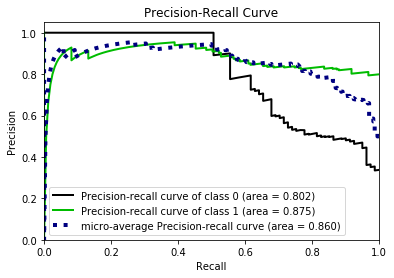

f1-score : 0.8615937687237867
[[251 155]
 [ 76 719]]
accuracy_score : 0.8076602830974188
Classification Report :               precision    recall  f1-score   support

           0       0.77      0.62      0.68       406
           1       0.82      0.90      0.86       795

    accuracy                           0.81      1201
   macro avg       0.80      0.76      0.77      1201
weighted avg       0.80      0.81      0.80      1201

[0.80412371 0.73958333 0.8125     0.76041667 0.79166667 0.84375
 0.71875    0.77083333 0.84375    0.875     ]
result mean : 0.7960373711340206, result std : 0.04712544004855572
CONFUSION MATRIX :
ACCURACY : 80.76602830974188
SENSITIVITY : 90.44025157232704
SPECIFICITY : 61.822660098522164


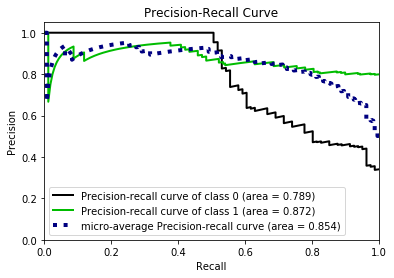

f1-score : 0.858682634730539
[[248 158]
 [ 78 717]]
accuracy_score : 0.8034970857618651
Classification Report :               precision    recall  f1-score   support

           0       0.76      0.61      0.68       406
           1       0.82      0.90      0.86       795

    accuracy                           0.80      1201
   macro avg       0.79      0.76      0.77      1201
weighted avg       0.80      0.80      0.80      1201

[0.82474227 0.73958333 0.83333333 0.79166667 0.76041667 0.84375
 0.72916667 0.77083333 0.80208333 0.83333333]
result mean : 0.7928908934707903, result std : 0.03924528603574805
CONFUSION MATRIX :
ACCURACY : 80.3497085761865
SENSITIVITY : 90.18867924528303
SPECIFICITY : 61.083743842364534


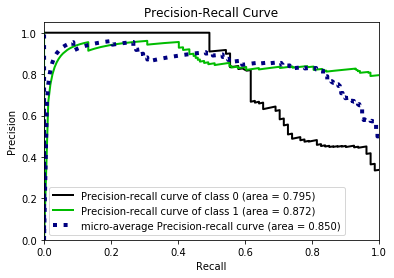

f1-score : 0.8691983122362869
[[263 143]
 [ 74 721]]
accuracy_score : 0.8193172356369692
Classification Report :               precision    recall  f1-score   support

           0       0.78      0.65      0.71       406
           1       0.83      0.91      0.87       795

    accuracy                           0.82      1201
   macro avg       0.81      0.78      0.79      1201
weighted avg       0.82      0.82      0.81      1201

[0.77319588 0.77083333 0.83333333 0.80208333 0.79166667 0.82291667
 0.75       0.77083333 0.83333333 0.85416667]
result mean : 0.8002362542955327, result std : 0.03267185349690689
CONFUSION MATRIX :
ACCURACY : 81.93172356369692
SENSITIVITY : 90.69182389937107
SPECIFICITY : 64.77832512315271


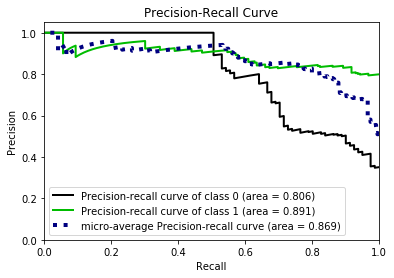

f1-score : 0.8656716417910448
[[251 155]
 [ 70 725]]
accuracy_score : 0.8126561199000832
Classification Report :               precision    recall  f1-score   support

           0       0.78      0.62      0.69       406
           1       0.82      0.91      0.87       795

    accuracy                           0.81      1201
   macro avg       0.80      0.77      0.78      1201
weighted avg       0.81      0.81      0.81      1201

[0.77319588 0.78125    0.83333333 0.76041667 0.77083333 0.83333333
 0.72916667 0.77083333 0.86458333 0.85416667]
result mean : 0.7971112542955326, result std : 0.04312704749076184
CONFUSION MATRIX :
ACCURACY : 81.26561199000832
SENSITIVITY : 91.19496855345912
SPECIFICITY : 61.822660098522164


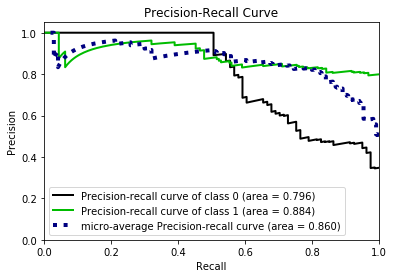

-- GENERATION 1 --
Evaluated 0 individuals
-- GENERATION 2 --
f1-score : 0.8691983122362869
[[263 143]
 [ 74 721]]
accuracy_score : 0.8193172356369692
Classification Report :               precision    recall  f1-score   support

           0       0.78      0.65      0.71       406
           1       0.83      0.91      0.87       795

    accuracy                           0.82      1201
   macro avg       0.81      0.78      0.79      1201
weighted avg       0.82      0.82      0.81      1201

[0.77319588 0.77083333 0.83333333 0.80208333 0.79166667 0.82291667
 0.75       0.77083333 0.83333333 0.85416667]
result mean : 0.8002362542955327, result std : 0.03267185349690689
CONFUSION MATRIX :
ACCURACY : 81.93172356369692
SENSITIVITY : 90.69182389937107
SPECIFICITY : 64.77832512315271


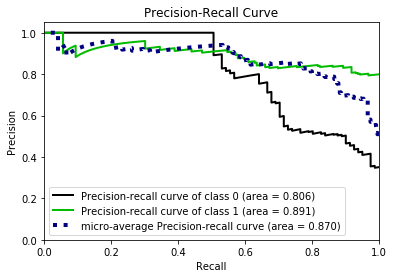

f1-score : 0.8687837028160575
[[257 149]
 [ 70 725]]
accuracy_score : 0.8176519567027477
Classification Report :               precision    recall  f1-score   support

           0       0.79      0.63      0.70       406
           1       0.83      0.91      0.87       795

    accuracy                           0.82      1201
   macro avg       0.81      0.77      0.79      1201
weighted avg       0.81      0.82      0.81      1201

[0.7628866  0.75       0.82291667 0.80208333 0.79166667 0.82291667
 0.75       0.75       0.85416667 0.85416667]
result mean : 0.7960803264604811, result std : 0.03964335216154267
CONFUSION MATRIX :
ACCURACY : 81.76519567027476
SENSITIVITY : 91.19496855345912
SPECIFICITY : 63.30049261083743


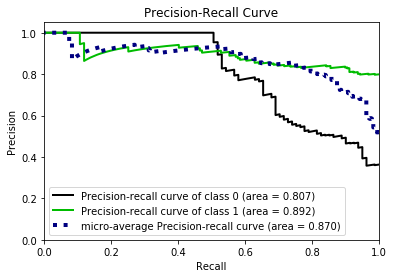

f1-score : 0.868421052631579
[[255 151]
 [ 69 726]]
accuracy_score : 0.8168193172356369
Classification Report :               precision    recall  f1-score   support

           0       0.79      0.63      0.70       406
           1       0.83      0.91      0.87       795

    accuracy                           0.82      1201
   macro avg       0.81      0.77      0.78      1201
weighted avg       0.81      0.82      0.81      1201

[0.79381443 0.75       0.82291667 0.80208333 0.78125    0.8125
 0.77083333 0.80208333 0.86458333 0.86458333]
result mean : 0.8064647766323023, result std : 0.03514925727548649
CONFUSION MATRIX :
ACCURACY : 81.6819317235637
SENSITIVITY : 91.32075471698113
SPECIFICITY : 62.80788177339901


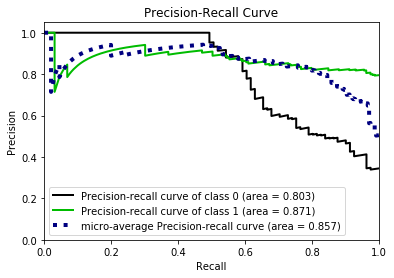

Evaluated 3 individuals
-- GENERATION 3 --
f1-score : 0.8691983122362869
[[263 143]
 [ 74 721]]
accuracy_score : 0.8193172356369692
Classification Report :               precision    recall  f1-score   support

           0       0.78      0.65      0.71       406
           1       0.83      0.91      0.87       795

    accuracy                           0.82      1201
   macro avg       0.81      0.78      0.79      1201
weighted avg       0.82      0.82      0.81      1201

[0.77319588 0.77083333 0.83333333 0.80208333 0.79166667 0.82291667
 0.75       0.77083333 0.83333333 0.85416667]
result mean : 0.8002362542955327, result std : 0.03267185349690689
CONFUSION MATRIX :
ACCURACY : 81.93172356369692
SENSITIVITY : 90.69182389937107
SPECIFICITY : 64.77832512315271


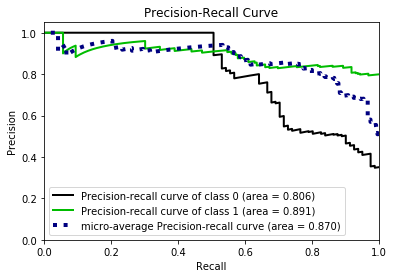

f1-score : 0.8732732732732733
[[263 143]
 [ 68 727]]
accuracy_score : 0.8243130724396336
Classification Report :               precision    recall  f1-score   support

           0       0.79      0.65      0.71       406
           1       0.84      0.91      0.87       795

    accuracy                           0.82      1201
   macro avg       0.82      0.78      0.79      1201
weighted avg       0.82      0.82      0.82      1201

[0.77319588 0.76041667 0.83333333 0.78125    0.80208333 0.82291667
 0.77083333 0.77083333 0.85416667 0.88541667]
result mean : 0.8054445876288661, result std : 0.03989044634036789
CONFUSION MATRIX :
ACCURACY : 82.43130724396336
SENSITIVITY : 91.44654088050315
SPECIFICITY : 64.77832512315271


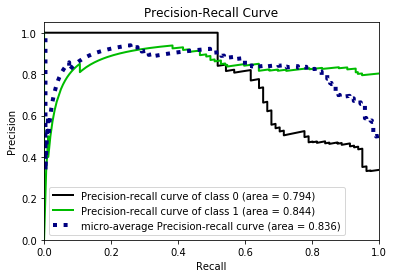

Evaluated 2 individuals
-- GENERATION 4 --
f1-score : 0.8732732732732733
[[263 143]
 [ 68 727]]
accuracy_score : 0.8243130724396336
Classification Report :               precision    recall  f1-score   support

           0       0.79      0.65      0.71       406
           1       0.84      0.91      0.87       795

    accuracy                           0.82      1201
   macro avg       0.82      0.78      0.79      1201
weighted avg       0.82      0.82      0.82      1201

[0.77319588 0.76041667 0.83333333 0.78125    0.80208333 0.82291667
 0.77083333 0.77083333 0.85416667 0.88541667]
result mean : 0.8054445876288661, result std : 0.03989044634036789
CONFUSION MATRIX :
ACCURACY : 82.43130724396336
SENSITIVITY : 91.44654088050315
SPECIFICITY : 64.77832512315271


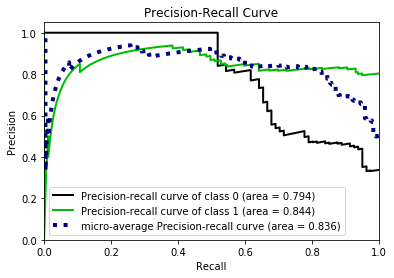

f1-score : 0.8732732732732733
[[263 143]
 [ 68 727]]
accuracy_score : 0.8243130724396336
Classification Report :               precision    recall  f1-score   support

           0       0.79      0.65      0.71       406
           1       0.84      0.91      0.87       795

    accuracy                           0.82      1201
   macro avg       0.82      0.78      0.79      1201
weighted avg       0.82      0.82      0.82      1201

[0.77319588 0.76041667 0.83333333 0.78125    0.80208333 0.82291667
 0.77083333 0.77083333 0.85416667 0.88541667]
result mean : 0.8054445876288661, result std : 0.03989044634036789
CONFUSION MATRIX :
ACCURACY : 82.43130724396336
SENSITIVITY : 91.44654088050315
SPECIFICITY : 64.77832512315271


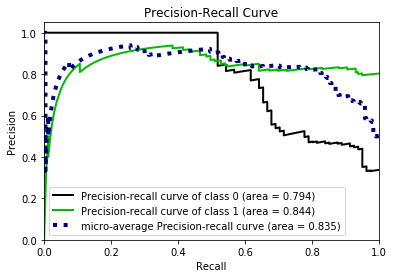

Evaluated 2 individuals
-- GENERATION 5 --
f1-score : 0.8663870581186339
[[255 151]
 [ 72 723]]
accuracy_score : 0.8143213988343048
Classification Report :               precision    recall  f1-score   support

           0       0.78      0.63      0.70       406
           1       0.83      0.91      0.87       795

    accuracy                           0.81      1201
   macro avg       0.80      0.77      0.78      1201
weighted avg       0.81      0.81      0.81      1201

[0.79381443 0.75       0.8125     0.78125    0.80208333 0.82291667
 0.72916667 0.79166667 0.84375    0.875     ]
result mean : 0.8002147766323023, result std : 0.04025045887150312
CONFUSION MATRIX :
ACCURACY : 81.43213988343048
SENSITIVITY : 90.9433962264151
SPECIFICITY : 62.80788177339901


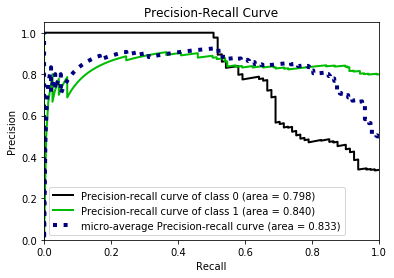

f1-score : 0.86810551558753
[[257 149]
 [ 71 724]]
accuracy_score : 0.8168193172356369
Classification Report :               precision    recall  f1-score   support

           0       0.78      0.63      0.70       406
           1       0.83      0.91      0.87       795

    accuracy                           0.82      1201
   macro avg       0.81      0.77      0.78      1201
weighted avg       0.81      0.82      0.81      1201

[0.80412371 0.75       0.82291667 0.77083333 0.8125     0.8125
 0.73958333 0.75       0.86458333 0.86458333]
result mean : 0.7991623711340206, result std : 0.043232562183615354
CONFUSION MATRIX :
ACCURACY : 81.6819317235637
SENSITIVITY : 91.06918238993711
SPECIFICITY : 63.30049261083743


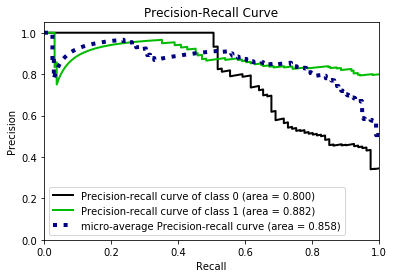

Evaluated 2 individuals
-- Only the fittest survives --
Best individual is [1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 

In [29]:
from feature_selection_ga import FeatureSelectionGA
import fitness_function as ff
fsga = FeatureSelectionGA(model,X_test,y_test,verbose=0,ff_obj = ff.FitnessFunction())
pop = fsga.generate(5)